<a href="https://colab.research.google.com/github/manisankar29/heart_disease_detection_using_machine_learning/blob/main/Heart_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE DETECTION**

## **I. Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
print(os.listdir())
warnings.filterwarnings('ignore')

['.config', 'drive', 'heart.csv', 'sample_data']


## **II. Importing and understanding the dataset**

In [2]:
data = pd.read_csv("/content/heart.csv")

### Verifying whether it is a 'dataframe' object in pandas or not

In [3]:
type(data)

pandas.core.frame.DataFrame

### Shape of dataset

In [4]:
data.shape

(303, 14)

### Printing out a few columns

In [5]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Description of dataset

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Understanding our columns much better

In [8]:
info = ["age",
        "1: male, 0: female",
        "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure",
        "serum cholestoral in mg/dl",
        "fasting blood sugar > 120 mg/dl",
        "resting ECG values(0,1,2)",
        "max heartrate achieved",
        "exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment",
        "no. of major vessels (0-3) colored by flourosopy",
        "thal: 3 = normal, 6 = fixed defect, 7 = revrsable defect"]

for i in range(len(info)):
  print(data.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting ECG values(0,1,2)
thalach:		max heartrate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		no. of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal, 6 = fixed defect, 7 = revrsable defect


### Analysing the 'target' variable

In [9]:
data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
data["target"].unique()

array([1, 0])

## **III. Exploratory Data Analysis (EDA)**

### Analysing the target variable

In [11]:
y = data["target"]
target_temp = data.target.value_counts()
print(target_temp)
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

1    165
0    138
Name: target, dtype: int64
Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


# **IV. Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop("target",axis=1)
Y = data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [13]:
X_train.shape

(242, 13)

In [14]:
X_test.shape

(61, 13)

In [16]:
Y_train.shape

(242,)

In [15]:
Y_test.shape

(61,)

# **V. Model Fitting**

In [17]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+"%")

The accuracy score achieved using Logistic Regression is: 85.25%


## Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm, Y_test)*100,2)
print("The accuracy score achieved using SVM is: "+str(score_lr)+"%")

The accuracy score achieved using SVM is: 85.25%


## K Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn, Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+"%")

The accuracy score achieved using KNN is: 67.21%


## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(2000):
  dt = DecisionTreeClassifier(random_state=x)
  dt.fit(X_train, Y_train)
  Y_pred_dt = dt.predict(X_test)
  curr_accuracy = round(accuracy_score(Y_pred_dt, Y_test)*100,2)
  if(curr_accuracy > max_accuracy):
    max_accuracy = curr_accuracy
    best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt, Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+"%")

The accuracy score achieved using Decision Tree is: 81.97%


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(2000):
  rf = RandomForestClassifier(random_state=x)
  rf.fit(X_train, Y_train)
  Y_pred_rf = rf.predict(X_test)
  curr_accuracy = round(accuracy_score(Y_pred_rf, Y_test)*100,2)
  if(curr_accuracy > max_accuracy):
    max_accuracy = curr_accuracy
    best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf, Y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+"%")

The accuracy score achieved using Random Forest is: 90.16%


## XGBoost

In [24]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+"%")

The accuracy score achieved using XGBoost is: 83.61%


## Neural Network

In [26]:
!pip install keras

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 4ms/step - loss: 53.2500 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 47.9280 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 42.7477 - accuracy: 0.4587
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 37.7171 - accuracy: 0.4587
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 33.0581 - accuracy: 0.4587
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 29.0178 - accuracy: 0.4587
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 25.4163 - accuracy: 0.4587
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 22.1838 - accuracy: 0.4587
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 18.9614 - accuracy: 0.4587
Epoch 10/300
8/8 [==============================] - 0s 4ms/step - loss: 15.7785 - accuracy: 0.4587
Epoch 11/300
8/8 [=

In [30]:
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn, Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+"%")

2/2 [==============================] - 0s 9ms/step
The accuracy score achieved using Neural Network is: 78.69%


# **VI. Output final score**

In [39]:
scores = [score_lr, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression","SVM","KNN","Decision Tree","Random Forest","XGBoost","Neural Networks"]
for i in range(len(algorithms)):
  print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score achieved using Logistic Regression is: 85.25%
The accuracy score achieved using SVM is: 81.97%
The accuracy score achieved using KNN is: 67.21%
The accuracy score achieved using Decision Tree is: 81.97%
The accuracy score achieved using Random Forest is: 90.16%
The accuracy score achieved using XGBoost is: 83.61%
The accuracy score achieved using Neural Networks is: 78.69%


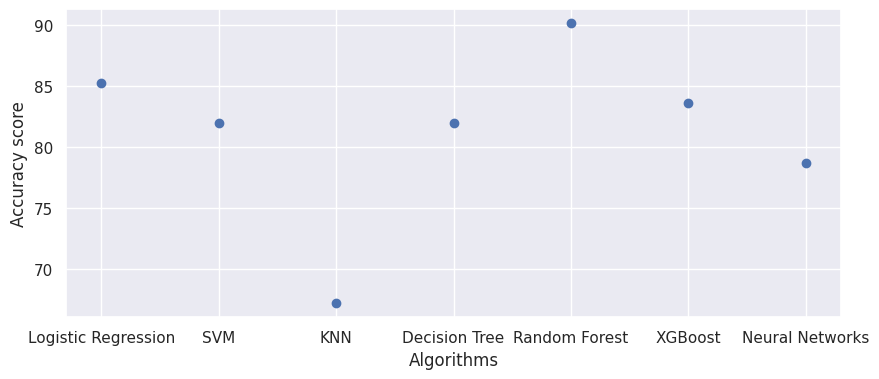

In [42]:
sns.set(rc={'figure.figsize':(10,4)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.scatter(algorithms,scores)
plt.show()

Therefore, Random Forest has good result when compared to other algorithms.

## **VII. Prediction on New Data**

In [43]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [44]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [45]:
p = rf.predict(new_data)
if p[0]==0:
  print("No Disease")
else:
  print("Disease")

No Disease


## **VIII. Save Model Using Joblib**

In [46]:
import joblib
joblib.dump(rf,'trained_model.joblib')

['trained_model.joblib']

In [47]:
from google.colab import files
files.download('trained_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **IX. GUI (Graphical User Interface)**

In [48]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00


In [49]:
!pip install Ipython

In [50]:
import ipywidgets as widgets
from IPython.display import display

model = joblib.load('trained_model.joblib')

def make_prediction(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
  input_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
  prediction = model.predict(input_data)
  if prediction[0] == 1:
    result_label.value = "Heart Disease Detected"
  else:
    result_label.value = "Heart Disease Not Detected"

age_input = widgets.FloatText(description='Age: ')
sex_input = widgets.IntText(min=0, max=1, description='Sex: ')
cp_input = widgets.IntText(min=1, max=4, description='Cerebral Palsy(CP): ')
trestbps_input = widgets.FloatText(description='Resting Blood Pressure: ')
chol_input = widgets.FloatText(description='Cholestrol: ')
fbs_input = widgets.IntText(min=0, max=1, description='Fasting Blood SUgar: ')
restecg_input = widgets.IntText(min=0, max=2, description='Resting ECG: ')
thalach_input = widgets.FloatText(description='Max Heart Rate: ')
exang_input = widgets.IntText(min=0, max=1, description='Exercise Induced Angina: ')
oldpeak_input = widgets.FloatText(description='Oldpeak: ')
slope_input = widgets.IntText(min=0, max=2, description='Slope: ')
ca_input = widgets.IntText(min=0, max=3, description='Cardiac Arrest: ')
thal_input = widgets.IntText(description='Thalassemia: ')

result_label = widgets.Label(value="Prediction: ")
widgets.interactive_output(
    make_prediction,
    {'age':age_input, 'sex': sex_input, 'cp': cp_input, 'trestbps': trestbps_input,
     'chol': chol_input, 'fbs': fbs_input, 'restecg': restecg_input, 'thalach': thalach_input,
     'exang': exang_input, 'oldpeak': oldpeak_input, 'slope': slope_input, 'ca': ca_input, 'thal': thal_input}
)

display(age_input, sex_input, cp_input, trestbps_input, chol_input, fbs_input, restecg_input, thalach_input, exang_input, oldpeak_input, slope_input,
        ca_input, thal_input)
display(result_label)


FloatText(value=0.0, description='Age: ')

IntText(value=0, description='Sex: ')

IntText(value=0, description='Cerebral Palsy(CP): ')

FloatText(value=0.0, description='Resting Blood Pressure: ')

FloatText(value=0.0, description='Cholestrol: ')

IntText(value=0, description='Fasting Blood SUgar: ')

IntText(value=0, description='Resting ECG: ')

FloatText(value=0.0, description='Max Heart Rate: ')

IntText(value=0, description='Exercise Induced Angina: ')

FloatText(value=0.0, description='Oldpeak: ')

IntText(value=0, description='Slope: ')

IntText(value=0, description='Cardiac Arrest: ')

IntText(value=0, description='Thalassemia: ')

Label(value='Heart Disease Detected')